In [23]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt

In [131]:
infile = open("hallvolt0",'rb')
hvolt = pickle.load(infile)
infile.close()


In [132]:
j = 27
pos = np.array(list(hvolt.keys()))[j:]
volt = np.array(list(hvolt.values()))[j:]

In [144]:
np.array(list(hvolt.values()))

array([4.2       , 4.2       , 4.2       , 4.2       , 4.2       ,
       4.2       , 4.2       , 4.2       , 4.2       , 4.2       ,
       4.2       , 4.2       , 4.2       , 4.2       , 4.2       ,
       4.2       , 4.2       , 4.2       , 4.2       , 4.2       ,
       4.2       , 4.2       , 4.2       , 4.2       , 4.2       ,
       4.2       , 4.19055355, 4.06630086, 3.95480429, 3.85488447,
       3.76484357, 3.68326824, 3.60926917, 3.54190352, 3.48038832,
       3.42389866, 3.37204465, 3.32476558, 3.28080273, 3.24027932,
       3.20265849, 3.16798841, 3.13550487, 3.10544768, 3.07736156,
       3.0510383 , 3.02648685, 3.00347987, 2.98195913, 2.96156482,
       2.94259829, 2.92437813, 2.90761762, 2.89173181, 2.87651707,
       2.86212079, 2.8486703 , 2.83577555, 2.82361305, 2.81224912,
       2.80115138, 2.79071735, 2.78089986, 2.77127117, 2.76256232,
       2.75359897, 2.7455276 , 2.73761514, 2.73013204, 2.72282022,
       2.71586448, 2.70948193, 2.70321198, 2.69723253, 2.69122

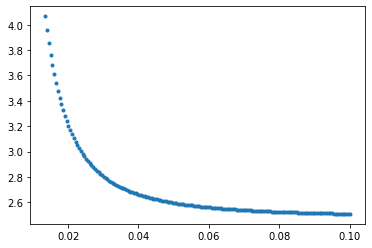

In [133]:
fig, ax = plt.subplots()

ax.plot(pos, volt,".")

In [134]:
def x2(X):
    return X[0]/pos**2+X[1]/pos**1+X[2]

def x2_err(X):
    return sum((volt-x2(X))**2)

In [135]:
x2_err(np.array([0.001, 0.01, 1.0]))

219.85138910931943

In [136]:
out = opt.minimize(
    x2_err,
    np.array([0.001, 0.01, 1.0])
)
out

      fun: 1.704706008688094e-06
 hess_inv: array([[ 4.71210948e-08, -3.24749083e-06,  4.01145198e-05],
       [-3.24749083e-06,  2.37586564e-04, -3.08448966e-03],
       [ 4.01145198e-05, -3.08448966e-03,  4.44674662e-02]])
      jac: array([-7.92015598e-07,  1.02871456e-06, -1.33400306e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([2.91788931e-04, 1.45567399e-05, 2.47981940e+00])

In [130]:
out = opt.minimize(
    x2_err,
    np.array([0.001, 0.01, 1.0])
)
out

      fun: 1.4651487283365909e-06
 hess_inv: array([[ 4.71210917e-08, -3.24749062e-06,  4.01145176e-05],
       [-3.24749062e-06,  2.37586550e-04, -3.08448953e-03],
       [ 4.01145176e-05, -3.08448953e-03,  4.44674652e-02]])
      jac: array([-0.02726316, -0.00720753,  0.00045509])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 236
      nit: 3
     njev: 56
   status: 2
  success: False
        x: array([2.91801933e-04, 1.28977530e-05, 9.09925753e-01])

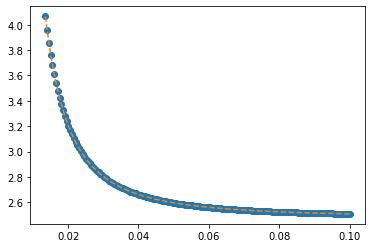

In [137]:
fig, ax = plt.subplots()

ax.plot(pos, volt,"o")
ax.plot(pos, x2(out.x),"--")

In [138]:
def inv_x2(X):
    return (-X[1]-np.sqrt(X[1]**2-4*X[0]*(X[2]-volt)))/(2*(X[2]-volt))

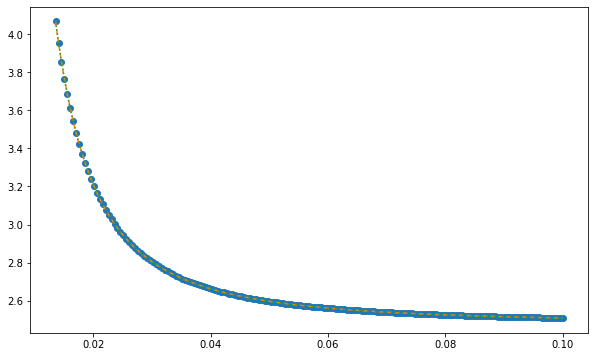

In [139]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(pos, volt,"o")
ax.plot(pos, x2(out.x),"--")
ax.plot(inv_x2(out.x), volt,":")

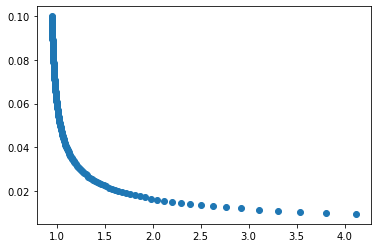

In [92]:
fig, ax = plt.subplots()

ax.plot(volt, pos, "o")

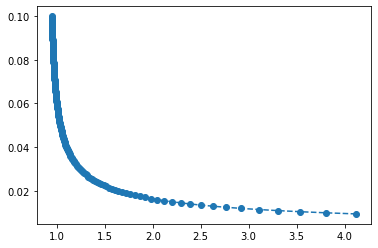

In [95]:
fig, ax = plt.subplots()

# ax.plot(pos, volt,"o")
# ax.plot(pos, x2(out.x),"--")
ax.plot(volt, inv_x2(out.x), "o--")

In [156]:
infile = open("hallvolt200_1500",'rb')
hvolt200 = pickle.load(infile)
infile.close()

j = 150
pos200 = np.array(list(hvolt200.keys()))[j:]
volt200 = np.array(list(hvolt200.values()))[j:]

infile = open("hallvolt201_1500",'rb')
hvolt201 = pickle.load(infile)
infile.close()

pos201 = np.array(list(hvolt201.keys()))[j:]
volt201 = np.array(list(hvolt201.values()))[j:]

volt200-volt201

array([0.00770629, 0.00783935, 0.0077392 , ..., 0.00763714, 0.00802059,
       0.00788673])

(array([ 2.,  1.,  4.,  1.,  5.,  3.,  4.,  9.,  4.,  9., 19., 18., 23.,
        24., 30., 37., 38., 37., 43., 49., 61., 51., 54., 56., 58., 67.,
        66., 48., 49., 63., 63., 50., 35., 48., 42., 37., 36., 24., 19.,
        13., 15., 11.,  6.,  5.,  3.,  4.,  0.,  3.,  0.,  3.]),
 array([0.00743236, 0.00744739, 0.00746242, 0.00747746, 0.00749249,
        0.00750753, 0.00752256, 0.00753759, 0.00755263, 0.00756766,
        0.0075827 , 0.00759773, 0.00761277, 0.0076278 , 0.00764283,
        0.00765787, 0.0076729 , 0.00768794, 0.00770297, 0.007718  ,
        0.00773304, 0.00774807, 0.00776311, 0.00777814, 0.00779318,
        0.00780821, 0.00782324, 0.00783828, 0.00785331, 0.00786835,
        0.00788338, 0.00789841, 0.00791345, 0.00792848, 0.00794352,
        0.00795855, 0.00797359, 0.00798862, 0.00800365, 0.00801869,
        0.00803372, 0.00804876, 0.00806379, 0.00807882, 0.00809386,
        0.00810889, 0.00812393, 0.00813896, 0.00815399, 0.00816903,
        0.00818406]),
 <BarContainer

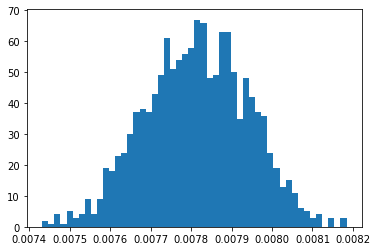

In [157]:
plt.hist(volt200-volt201, 50)

In [158]:
np.mean(volt200-volt201)

0.00781386030738015

In [159]:
np.mean(volt200-volt201)

0.00781386030738015

In [160]:
np.std(volt200-volt201)

0.0001269869171612698